In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

from sklearn import datasets, linear_model
import statsmodels.api as sm
import scipy.stats as st

In [2]:
task_1 = pd.read_excel(
    '3_task_моделирование.xlsx', 
    sheet_name = 'Задание 1'
)[
    ['Порядковый номер наблюдения','Время ожидания, c']
]
task_2 = task_1.set_index('Порядковый номер наблюдения')
task_2

,"Время ожидания, c"
Порядковый номер наблюдения,
1,27
2,24
3,17
4,19
5,30
6,29
7,23
8,31
9,19


# 1 Можно ли утверждать, что среднее время ожидания ответа оператора стало больше 20 секунд (допуская, что время ожидания имеет нормальное распределение)

In [3]:
p_val = st.ttest_ind(
    task_2[0:20],
    task_2[10:31],
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0).pvalue[0]

delta = round( task_2[10:31].mean()[0] - task_2[0:20].mean()[0] , 2)
delta_p = delta / task_2[0:20].mean()[0]
disps = round(np.var(task_2[0:20])[0],2),round(np.var(task_2[10:31])[0],2)
means = round(np.mean(task_2[0:20])[0],2),round(np.mean(task_2[10:31])[0],2)


delta

ans = f'''
    Различие:             {delta} 
    Дисперсии:            {disps}
    Средние:              {means}
    Дисперсии_к_среднему: {round( disps[0]/means[0],2), round(disps[1]/means[1],2)}
    Различие в %:         {delta_p:.2%}
    P_значение:           {p_val:.2%}
    Статистически значимых улучшений нет. Слишком высокая дисперсия у групп - больше, чем среднее.
'''

print(ans)


    Различие:             -0.55 
    Дисперсии:            (33.45, 47.54)
    Средние:              (22.95, 22.4)
    Дисперсии_к_среднему: (1.46, 2.12)
    Различие в %:         -2.40%
    P_значение:           79.14%
    Статистически значимых улучшений нет. Слишком высокая дисперсия у групп - больше, чем среднее.



# 2 Какой нужен объём выборки для доверительного интервала 95% с точностью +-2 секунды.

In [4]:
# Сначала вычисляем доверительный интервал для текущей выборки
# Затем делаем "Reversive Modelling" - обратный расчёт, исходя из выбранных параметров
std_n = np.std(
    task_2, 
    axis=None, 
    dtype=None, 
    out=None, 
    ddof=0)[0]

sqrt_n = np.sqrt( len(task_2) )

mean_n = task_2.mean()

SEM = std_n / sqrt_n
SEM

mean_n[0]

22.833333333333332

95% распределения выборочных средних находится в пределах 1,96 стандартных отклонений (SD) среднего популяции.

In [5]:
SEM_n = 2/1.96
n = ( std_n / SEM_n )**2
print(f'Минимальный объём выборки: {round(n,0)+1}' )

Минимальный объём выборки: 40.0


# 3 Получить уравнение линейной регрессии для предсказания объёма продаж в зависимости от затрат на рекламу
### Показать на графике модель и наблюдения
### Предсказать объём продаж при расходах 121 тыс. руб.
### Оценить статистическую значимость коэффициентов

In [6]:
task_3 = pd.read_excel(
    '3_task_моделирование.xlsx', 
    sheet_name = 'Задание 2'
)[
    ['Затраты на рекламу, тыс. руб.','Объем продаж, тыс. шт.']
]
task_3

,"Затраты на рекламу, тыс. руб.","Объем продаж, тыс. шт."
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [7]:
X = np.array(task_3['Затраты на рекламу, тыс. руб.']).reshape(-1,1)
y = np.array(task_3['Объем продаж, тыс. шт.']).reshape(-1,1)

reg = LinearRegression().fit(X, y)
reg.score(X, y)
Predict = reg.predict(
    X
            ).reshape(-1,1)

a = reg.coef_[0][0]
b = reg.intercept_[0]

print(f'Объем продаж, тыс. шт. = {b:.3f} + {a:.2%} * Затраты на рекламу, тыс. руб.')

Объем продаж, тыс. шт. = 7.033 + 4.75% * Затраты на рекламу, тыс. руб.


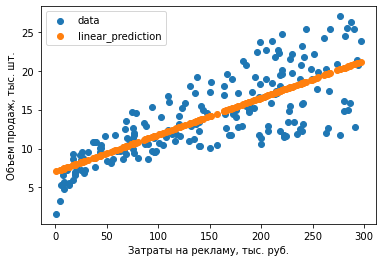

In [8]:
plt.scatter(X, y, label='data')
plt.scatter(X, Predict, label='linear_prediction')

plt.xlabel('Затраты на рекламу, тыс. руб.')
plt.ylabel('Объем продаж, тыс. шт.')

plt.legend();
plt.show()

In [9]:
X_1 = np.array([121]).reshape(-1,1)

In [10]:
predict_121 = reg.predict(
    X_1
            )[0][0]

f'При затратах 121 тыс. руб. пргноз: {predict_121:.3} тыс. шт.'

'При затратах 121 тыс. руб. пргноз: 12.8 тыс. шт.'

In [11]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                   3.52e-100
Time:                        09:45:59   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-квадрат высокий - 94%,

Т.к. Prob (F-statistic) околонулевой - критерий уравнения значим

# 4 Предложить метрику оценки качества двух моделей оценки вероятности дефолта (PD) с графической интерпретацией

In [12]:
task_4 = pd.read_excel(
    '3_task_моделирование.xlsx', 
    sheet_name = 'Задание 3'
)[
    ['Факт дефолта','PD  модель 1', 'PD  модель 2']
]
task_4

,Факт дефолта,PD модель 1,PD модель 2
0,0,0.409821,0.526825
1,0,0.576899,0.606770
2,0,0.470889,0.499478
3,0,0.256406,0.334723
4,0,0.324825,0.403021
...,...,...,...
306,0,0.488246,0.568671
307,0,0.508478,0.518769
308,1,0.515479,0.109161
309,0,0.555875,0.558406


### 1 предложение
#### оценить для каждой модели - насколько она оказалсь ближе к правильному решению относительно 0.5 - "непонятно, как"

In [13]:
def DF_delta_1(x):
    if x['Факт дефолта'] == 0:
        y_1 = 0.5 - x['PD  модель 1']
    else:
        y_1 = x['PD  модель 1'] - 0.5
    return y_1

def DF_delta_2(x):
    if x['Факт дефолта'] == 0:
        y_1 = 0.5 - x['PD  модель 2']
    else:
        y_1 = x['PD  модель 2'] - 0.5
    return y_1


task_4['delta_1'] = task_4[['Факт дефолта','PD  модель 1']].apply(DF_delta_1, axis = 1)
task_4['delta_2'] = task_4[['Факт дефолта','PD  модель 2']].apply(DF_delta_2, axis = 1)
task_4

,Факт дефолта,PD модель 1,PD модель 2,delta_1,delta_2
0,0,0.409821,0.526825,0.090179,-0.026825
1,0,0.576899,0.606770,-0.076899,-0.106770
2,0,0.470889,0.499478,0.029111,0.000522
3,0,0.256406,0.334723,0.243594,0.165277
4,0,0.324825,0.403021,0.175175,0.096979
...,...,...,...,...,...
306,0,0.488246,0.568671,0.011754,-0.068671
307,0,0.508478,0.518769,-0.008478,-0.018769
308,1,0.515479,0.109161,0.015479,-0.390839
309,0,0.555875,0.558406,-0.055875,-0.058406


In [14]:
task_4['delta_1_agg'] = task_4['delta_1'].cumsum(axis = 0) / len( task_4['delta_1'] )
task_4['delta_2_agg'] = task_4['delta_2'].cumsum(axis = 0) / len( task_4['delta_2'] )
task_4['delta_cumsums'] = task_4['delta_1_agg'] - task_4['delta_2_agg']

<AxesSubplot:>

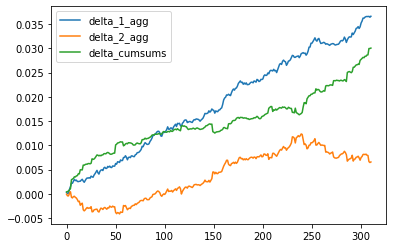

In [15]:
task_4[['delta_1_agg','delta_2_agg','delta_cumsums']].plot()

In [16]:
pd_1 = pd.DataFrame( task_4[['delta_1','delta_2']].mean(), columns=['mean'] )

In [17]:
pd_2 = pd.DataFrame( task_4[['delta_1','delta_2']].var(), columns=['var'] )

In [18]:
df = pd_1.join(pd_2)

In [19]:
df

,mean,var
delta_1,0.036629,0.009256
delta_2,0.006568,0.015159


In [20]:
delt = task_4['delta_1'].mean() - task_4['delta_2'].mean()
delt

0.030060409542131388

In [21]:
stest = st.ttest_ind(task_4['delta_1'], task_4['delta_2']).pvalue
stest

0.0007360871932160367

In [22]:
print(f'''
Первая модель лучше второй в среднем на {delt:.2} сотых от среднего с p-значением {stest:.3}
Т.е., первая модель лучше второй - чуть-чуть, но статистичеки значимо.''')


Первая модель лучше второй в среднем на 0.03 сотых от среднего с p-значением 0.000736
Т.е., первая модель лучше второй - чуть-чуть, но статистичеки значимо.


### 2 предложение
#### Сравнить по показателю ROC-AUC

ROC-AUC = 70.14%


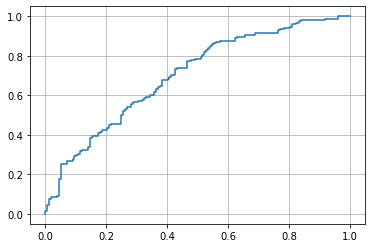

In [23]:
fpr, tpr, thres = roc_curve(task_4['Факт дефолта'], task_4['PD  модель 1'])

auto_fpr_tpr = pd.DataFrame(fpr, tpr).reset_index()

auto_fpr_tpr.columns=['tpr','fpr']

print(f"ROC-AUC = {roc_auc_score(task_4['Факт дефолта'], task_4['PD  модель 1']):.2%}")
plt.plot( fpr, tpr )
plt.grid()

ROC-AUC = 61.24%


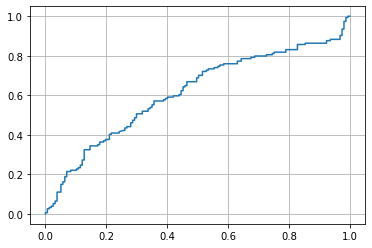

In [24]:
fpr, tpr, thres = roc_curve(task_4['Факт дефолта'], task_4['PD  модель 2'])

auto_fpr_tpr = pd.DataFrame(fpr, tpr).reset_index()

auto_fpr_tpr.columns=['tpr','fpr']

print(f"ROC-AUC = {roc_auc_score(task_4['Факт дефолта'], task_4['PD  модель 2']):.2%}")
plt.plot( fpr, tpr )
plt.grid()

In [25]:
f'По сравнению ROC-AUC первая модель также чуть-чуть лучше второй'

'По сравнению ROC-AUC первая модель также чуть-чуть лучше второй'

# 5 Посторить 2 модели предсказания дефолта и выбрать лучшую на основе показателя AUC-ROC

In [26]:
task_5 = pd.read_excel(
    '3_task_моделирование.xlsx', 
    sheet_name = 'Задание 4'
)[
    ['No','predictor 1', 'predictor 2', 'predictor 3', 'predictor 4', 'predictor 5', 'target']
]

task_6 = task_5.set_index('No')

task_6['predictor 6'] = task_6['predictor 3'].apply(lambda x: 1 if np.isnan(x) else 0)
task_6['predictor 3'] = task_6['predictor 3'].fillna(0)
task_6

,predictor 1,predictor 2,predictor 3,predictor 4,predictor 5,target,predictor 6
No,,,,,,,
1,12423,710,441.5,5,4631.0,1,0
2,13983,1106,0.0,3,4256.0,1,1
3,15520,1276,391.5,1,4397.0,0,0
4,29535,1106,0.0,1,3772.0,1,1
5,26154,976,315.0,5,2445.0,1,0
...,...,...,...,...,...,...,...
9996,17220,1450,421.5,3,1759.0,0,0
9997,6173,1100,0.0,1,4521.0,0,1
9998,41944,1122,311.0,13,4087.0,0,0


In [27]:
X = task_6[['predictor 1','predictor 2','predictor 3','predictor 4','predictor 5','predictor 6']]
y = task_6[['target']]
clf_1 = LogisticRegression(random_state=0).fit(X, y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
clf_2 = tree.DecisionTreeRegressor()
clf_2 = clf_2.fit(X, y)

In [29]:
tag = y.join( pd.DataFrame( clf_2.predict(X), index = range(1,10001) ) )
tag['delta'] = tag['target'] - tag[0]
tag['delta'].unique()

array([0.])

ROC-AUC = 52.66%


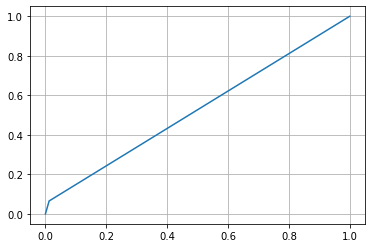

In [30]:
fact = task_6['target']
test = clf_1.predict(X)


fpr, tpr, thres = roc_curve(fact, test)

auto_fpr_tpr = pd.DataFrame(fpr, tpr).reset_index()

auto_fpr_tpr.columns=['tpr','fpr']

print(f"ROC-AUC = {roc_auc_score(fact, test):.2%}")
plt.plot( fpr, tpr )
plt.grid()

ROC-AUC = 100.00%


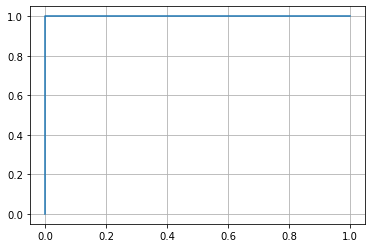

In [31]:
fact = task_6['target']
test = clf_2.predict(X)


fpr, tpr, thres = roc_curve(fact, test)

auto_fpr_tpr = pd.DataFrame(fpr, tpr).reset_index()

auto_fpr_tpr.columns=['tpr','fpr']

print(f"ROC-AUC = {roc_auc_score(fact, test):.2%}")
plt.plot( fpr, tpr )
plt.grid()

In [32]:
print(f'''Первая модель логистической регрессии имеет средненький ROC-AUC около 50%, но дерево решений угадывает всё
В таком случае можно проверить модель на переобученность, разделив выборку на тренировочную и проверочную
''')

Первая модель логистической регрессии имеет средненький ROC-AUC около 50%, но дерево решений угадывает всё
В таком случае можно проверить модель на переобученность, разделив выборку на тренировочную и проверочную

